# Assignment exploratory data analysis

For this assignment I am using data from Fitbit and a survey from a French study. The analysis and visualizations are made with Pandas, Matplotlib and the Seaborn library and Math. 

### Tables of survey and steps data
In the first step, we're merging the survey data with the steps data. 

In [40]:
# Import the libraries we use for our data visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [41]:
# Open the first dataset we are going to use (steps.csv)
df1 = pd.read_csv('steps.csv', sep=";", )# Show steps.csv in a table
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Open the second dataset we are going to use (survey.csv)
df2 = pd.read_csv('survey.csv')# Show steps.csv in a table
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [43]:
# Merge the two datasets
df = pd.merge(df1, df2, on = 'id') # show merged survey.csv and steps.csv in one table based on 'id' as common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [44]:
# Apply a function to all elements
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

# Delete strange weight values (> 250 kg)
def above_250(x):
    if(x > 205.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_250)

In [45]:
# Show all participants' steps per year
df_years = df.loc[:,"20-6-2013":"13-5-2014"]
df_years.head()

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,15773.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,2952.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,5700.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mean steps per participant
Secondly, we're searching for the mean steps per participant. Therefore, we calculate the mean of steps per participant.

In [47]:
# Calculate the mean for steps per partcipant per year
df['mean_steps'] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1) #axis=1 calculates mean over columns
# Show mean_steps
df.head() 

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


### The relation between (mean) steps per partcipant, weight and height
Now we can look at the relation between the mean steps, weight and height of each participant. This is the first version of the scatterplot since we have to review this plot for any strange values in the data.

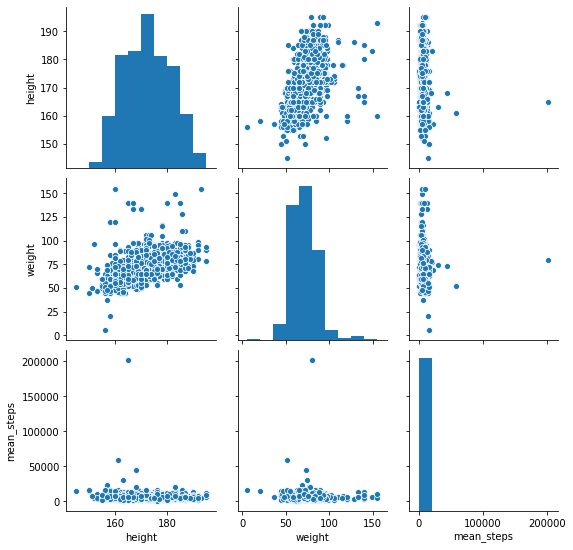

In [48]:
# Create a scatterplot for height, weight and mean_steps
df_sel = df[['height', 'weight', 'mean_steps']]
sns.pairplot(df_sel)
plt.show()

### Scatterplot (version 1)
The scatterplot show some strange outlines (the single points in graphs top-right, middle-right, bottom-left and bottom-middle). We can review the data per variable by looking at the single variables, visualized in a barchart. 

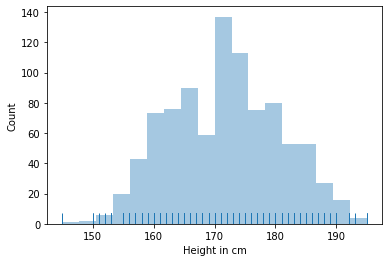

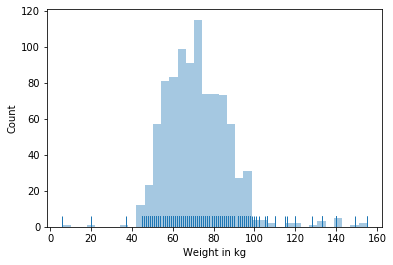

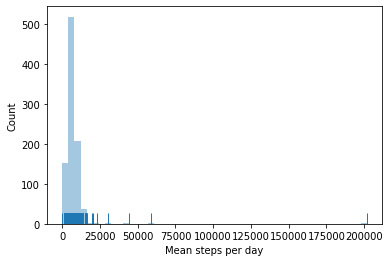

In [49]:
# Create barcharts for each single variable
sns.distplot(df["height"], rug=True, kde=False) #the rug=True allows us to see individual values
plt.xlabel("Height in cm")
plt.ylabel("Count")
plt.show()

sns.distplot(df["weight"], rug=True, kde=False) 
plt.xlabel("Weight in kg")
plt.ylabel("Count")
plt.show()

sns.distplot(df["mean_steps"], rug=True, kde=False) 
plt.xlabel("Mean steps per day")
plt.ylabel("Count")
plt.show()

What can we conclude from the barcharts?
- Height: each value < 140 (cm) and > 200 (cm) should be removed from the dataset.
- Weight: each value < 35 (kg) and > 200 (kg) should be romeved from the dataset.
- Mean steps: each value > 75000(steps) should be removed from the dataset. 

In [50]:
# Clean the data
# Remove implausible values by mask() and between(), replace the values with NaN
df["height"].mask(df["height"].between(0, 140), inplace=True) 
df["weight"].mask(df["weight"].between(0, 35), inplace=True)
df["weight"].mask(df["weight"].between(200, 1000), inplace=True)
df["mean_steps"].mask(df["mean_steps"].between(75000, 300000), inplace=True)

### Scatteplot (Version 2)
This scatterplot shows more reliable values compared to Version 1.

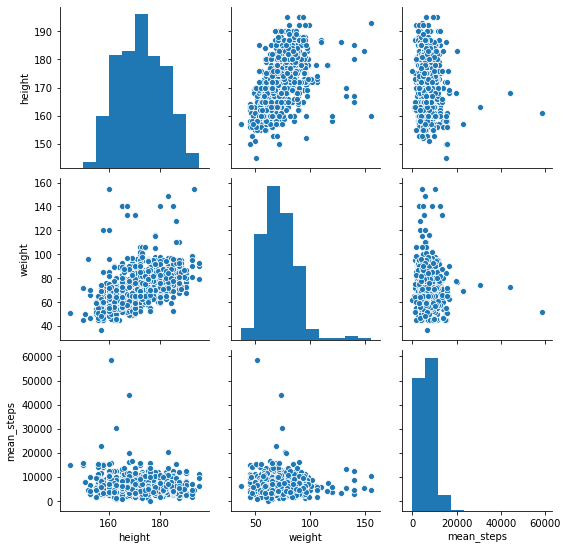

In [51]:
# Create another scatterplot
variables = df[["height", "weight", "mean_steps"]] #make selection
sns.pairplot(variables)#create scatterplot matrix
plt.show()

## Analyzing relations
We focus on the relation between height and mean steps and height and weight. Firstly, we create a scotterplot of each combination. Secondly, we look at the correlation based on Pearson's r. 

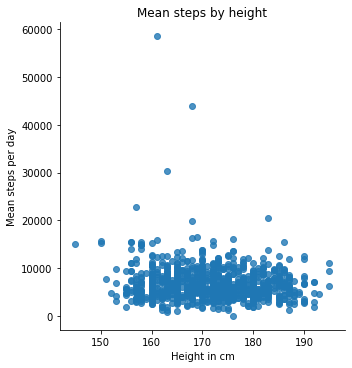

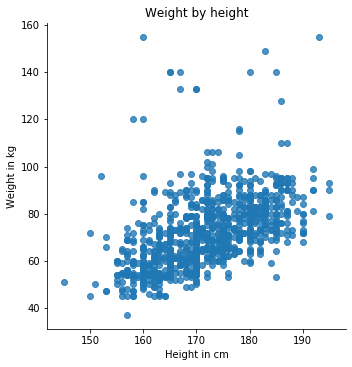

In [52]:
# Mean steps by height
sns.lmplot(x='height', y='mean_steps', fit_reg=False, data=df)
plt.xlabel('Height in cm') 
plt.ylabel('Mean steps per day')
plt.title('Mean steps by height')
plt.show()

# Weight by height
sns.lmplot(x='height', y='weight', fit_reg=False, data=df)
plt.xlabel('Height in cm') 
plt.ylabel('Weight in kg')
plt.title('Weight by height')
plt.show()

# How to get r value in graphs?

In [53]:
# Import Pearson's r library
from scipy.stats.stats import pearsonr

# Make sure to drop all Na values
variables = variables.dropna() 

# Calculate Pearson's r for height and mean steps
print(pearsonr(variables['height'], variables['mean_steps']))

# Calculate Pearson's r for height and weight
print(pearsonr(variables['height'], variables['weight']))

(-0.09035480719937922, 0.006153428450897307)
(0.5110669373491963, 3.156690525355999e-62)


We can conclude the following: 
- If we look at the graph, we can already conclude the data is linear based on the movements of the values. 
- For height and mean steps Pearson's r value is -0.0903 and the p-value is 0.006. The r value indicates that the correlation is quite weak (< 0.3). The p-value indicates that the significance is quite high (between 0-1)
- For height and weight Pearson's r value is 0.51. This is a moderate correlation. The p-value for height and weight is 3.15. This is a quite high p-value, and therefore less reliable. 



### Relation between a numercial and categorical variable
We want to check if there's a relation between mean steps and the gender. A swarmplot and boxplot summerize the data. 

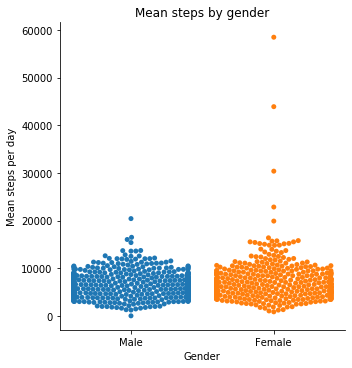

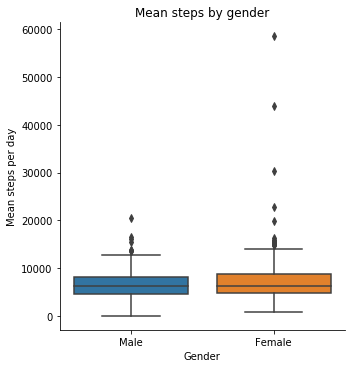

In [54]:
# Make sure to drop all non-valid values
df_subset = df[["gender", "mean_steps"]].dropna()

# Create a swarn plot of gender and meansteps to visualize the distribution
sns.catplot(data = df_subset, x = "gender", y = "mean_steps", kind = "swarm") 
plt.xlabel("Gender") 
plt.ylabel("Mean steps per day")
plt.title("Mean steps by gender")

# Create a boxplot of gender and meansteps to visualize the distribution
sns.catplot(data = df_subset, x = "gender", y = "mean_steps", kind = "box")
plt.xlabel("Gender") 
plt.ylabel("Mean steps per day")
plt.title("Mean steps by gender")
plt.show()

The distribution of men and women seems almost equally divided. 

### Relation between two categorical variables: education & gender
We want to check the relation between gender and education. 


In [27]:
# Show absolute numbers of education and gender
pd.crosstab(df["education_1"], df["gender"], margins=True)

gender,Female,Male,All
education_1,,,
Bachelor,185,172,357
High school,63,43,106
Master or doctorate,159,253,412
No degree,0,1,1
Primary,7,6,13
Vocational,21,19,40
All,435,494,929


According to the absolute numbers, more men have a master or doctorate than women. But less men have finished high school. 

In [55]:
# Show relative numbers (normalized) for education and gender
pd.crosstab(df["education_1"], df["gender"], normalize="columns", margins=True) 

gender,Female,Male,All
education_1,,,
Bachelor,0.425287,0.348178,0.384284
High school,0.144828,0.087045,0.114101
Master or doctorate,0.365517,0.512146,0.443488
No degree,0.000000,0.002024,0.001076
Primary,0.016092,0.012146,0.013994
Vocational,0.048276,0.038462,0.043057


The relative numbers validate our assumption: more men have a master or doctorate but less men have finished high school. 

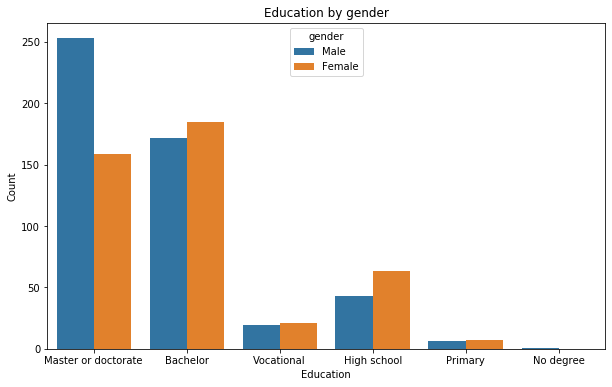

In [56]:
# Set the right canvas size
plt.figure(figsize=(10, 6)) 

# Select data and create plot
plot = sns.countplot(data = df, x = "education_1", hue = "gender") 

# Plot a barchart
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education by gender")
plt.show()

The graph visualizes our assumption again. 